/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', '0', '20', '32', '33', '34', '35', '36', '42', '43', '44',
       '45', '48', '49', '50', '51', '52', '53', '57', '58', '65', '66', '67',
       '68', '71', '72'],
      dtype='object')

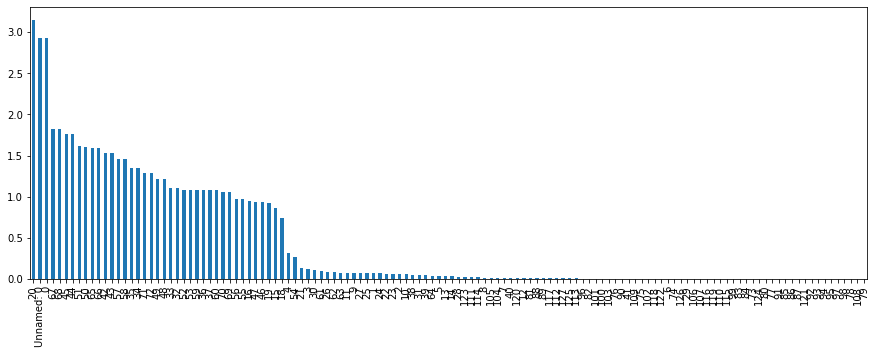

In [ ]:
import numpy as np  # A fundamental package for linear algebra
import pandas as pd  # Data Analysis and data manipulating tool
import random  # Library to generate random numbers
from collections import Counter  # Collection is a Python module
import matplotlib.pyplot as plt
import matplotlib as mpl
# Visualization Libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from numpy import genfromtxt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2




# Read in Raw Dataset
nfl_data = pd.read_csv(r'/content/Data/NFL Play by Play 2009-2018 (v5).csv')




# We need to identify all of the missing data in our data set. 
nfldata_count_of_missval_by_col = (nfl_data.isnull().sum())






"""
we noticed about the data was that there were 12,874 plays that resulted in an outcome of “No Play” or NULL play type. 
What this means for our data set is that for various reasons, there was no play that happened and that led to NULL values 
for a large portion of the data.  The reason why this is a big issue is because 56 other columns had exactly 12,874 missing values. 
That resulted in a total of 733,818 missing values across those columns. Since our goal is to predict the outcome of football games 
based upon the statistics that happened on each play, we decided that removing all of the no play and 
null play types would help to improve the quality of data.
"""
nfl_data_without_no_play = nfl_data['play_type'].isin(['no_play'])
nfl_data_without_no_play = nfl_data['play_type'].isnull()
df = nfl_data[~nfl_data_without_no_play]







"""
 Initial data set had a total of 44,121,484 missing values spread over 255 different columns. 
 77 columns were missing over 90% of their data, which ended up being at least 404433/449371 of the total data in those columns. 
 In order to help reduce dimensionality and to help the model learn better, 
 we decided to remove all of the columns that were missing more than 90% of the data
"""
limitPer = len(df) * .10
thedf = df.dropna(thresh=limitPer, axis=1)








"""
Need to remove all of the categorical data. Since the categorical data only accounted for less than 4% of the data, 
it contributed to the missing values substantially. 
Removing the categorical data reduced our missing values from 8,673,006 to 2,126,984.
"""
df_numerical = thedf.loc[:,thedf.dtypes==np.int64]
df_numerical = thedf.loc[:,thedf.dtypes==np.float64]






# Feature Selection with ~3.84% of the data imputed using Singular Value Decomposition (SVD)
nfl_svd_data = pd.read_csv("/content/Imputed_Data/numeric_nfl-SVD.csv")

X = nfl_svd_data.drop('17', axis=1)
y = nfl_svd_data['17']


# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape


# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


corr_features = correlation(X_train, 0.9)
corr_features

# According to the correlation feature selection method, the following columns are 90% or more correlated to eachother:
# {'0','105','111','112','18','19','24','33','35','37','43','45','47','49','50','51','52','53','55','56','57','58','59','60','66','67','68','70','72'}












# Mutual Information 



X_train1,X_test1,y_train1,y_tes1t=train_test_split(nfl_svd_data.drop(labels=['17'], axis=1),
    nfl_svd_data['17'],
    test_size=0.2,
    random_state=0)


from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train1.fillna(0), y_train1)
mutual_info

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train1.columns
mutual_info.sort_values(ascending=False)


mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train1.fillna(0), y_train1)
selected_top_columns.get_support()
X_train1.columns[selected_top_columns.get_support()]

 # According to mutual information feature selected, the following columns are the variables that share the most mutual information
 #  '0', '20', '32', '33', '34', '35', '36', '42', '43', '44',
 #  '45', '48', '49', '50', '51', '52', '53', '57', '58', '65', '66', '67',
 #  '68', '71', '72'






